# 最適状態価値(optimal state value,V*(s)) 
#             と最適行動価値(Q-value) 
最適状態価値とは、エージェントが最適に行動したことを前提として、ある状態sに達した後、    
平均的に期待できる未来の報酬の合計のこと。    <br> <br>
式 16-1 ベルマン最適方程式             
\begin{equation}
    V(s) = max_a\sum_{s'}T(s,a,s')[R(s,a,s') + \gamma V(s')]  
\end{equation} 
式16-2 価値反復法のアルゴリズム    
\begin{equation}
    V_{k+1}(s) \leftarrow max_a\sum_{s'}T(s,a,s')[R(s,a,s') + \gamma V_{k}(s')] 
\end{equation} 
\begin{equation}
    V_{k+1}(s) \leftarrow max_a Q_k(s,a)
\end{equation} 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for all s    
式16-3 Q-値反復アルゴリズム    
\begin{equation}
    Q_{k+1}(s,a) \leftarrow \sum_{s'}T(s,a,s')[R(s,a,s') + \gamma max_{a'}Q_{k}(s',a')] 
\end{equation} 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for all (s,a)      
式16-4 TD学習のアルゴリズム    
\begin{equation}
    V_{k+1}(s) \leftarrow (1-\alpha )V_{k}(s) + \alpha (r+\gamma V_{k}(s'))
\end{equation} 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for all s    
式16-5 Q-learningアルゴリズム    
\begin{equation}
    Q_{k+1}(s,a) \leftarrow (1-\alpha )Q_{k}(s,a) + \alpha (r+\gamma max_{a'}Q_{k}(s',a'))
\end{equation} 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for all (s,a) 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(1,1)
plt.clf()

<Figure size 432x288 with 0 Axes>

In [2]:
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"})

In [14]:
nan=np.nan
T = np.array([
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], # in s0, if action a0 then proba 0.7 to state s0 and 0.3 to state s1, etc.
        [[0.0, 1.0, 0.0], [nan,nan,nan], [0.0, 0.0, 1.0]],
        [[nan,nan,nan], [0.8, 0.1, 0.1], [nan,nan,nan]],
    ])

R = np.array([
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
    ])

possible_actions = [[0, 1, 2], [0, 2], [1]]

Q = np.full((3,3),-np.inf)
V = [0,0,0]
for state, actions in enumerate(possible_actions):
    Q[state,actions] = 0.0
print(Q)

discount_rate = 0.95
n_iterations = 100

for iteration in range(n_iterations):
    Q_prev = Q.copy()
    for s in range(3):
        for a  in possible_actions[s]:
            Q[s,a] = np.sum([
                T[s,a,sp]*(R[s,a,sp] + discount_rate* np.max(Q_prev[sp])) for sp in range(3)
            ])
        V[s] = np.max(Q[s])
print("Q-value")
print(Q)
print(np.argmax(Q,axis=1))
print("optimal state value")
print(V)

[[  0.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]]
Q-value
[[21.88646117 20.79149867 16.854807  ]
 [ 1.10804034        -inf  1.16703135]
 [       -inf 53.8607061         -inf]]
[0 2 1]
optimal state value
[21.88646116788489, 1.167031352301585, 53.86070610154327]


#  q-learning

In [4]:
learning_rate0 = 0.3
learning_rate_decay = 0.01
n_iterations = 20000
s = 0
Q = np.full((3,3),-np.inf)
for state, actions in enumerate(possible_actions):
    Q[state, actions] = 0.0

for iteration in range(n_iterations):
    a = np.random.choice(possible_actions[s])
    sp = np.random.choice(range(3), p = T[s,a])
    reward = R[s,a,sp]
    learning_rate = learning_rate0/(1 + iteration* learning_rate_decay)
    Q[s, a] = ((1- learning_rate)*Q[s,a] + 
              learning_rate * (reward + discount_rate * np.max(Q[sp])))
    s = sp
print(Q)
print(np.argmax(Q,axis = 1))

[[26.32308111 24.88026108 20.75124375]
 [ 5.6513263         -inf  5.03454607]
 [       -inf 57.73630342        -inf]]
[0 0 1]


# record outputs

In [5]:
def qLearning(l_rate0 = 0.5,l_decay=0.01,n_ite = 50000,discount_r=0.99): 
    learning_rate0 = l_rate0
    learning_rate_decay = l_decay
    n_iterations = n_ite
    discount_rate = discount_r    
    print("l_rate0= %f , l_decay=%f \nn_ite= %d, discount_r= %f " %(learning_rate0,learning_rate_decay,
                                                           n_iterations,discount_rate))
    s = 0
    Qs = []
    Q = np.full((3,3),-np.inf)
    for state, actions in enumerate(possible_actions):
        Q[state, actions] = 0.0

    for iteration in range(n_iterations):
        a = np.random.choice(possible_actions[s])
        sp = np.random.choice(range(3), p = T[s,a])
        reward = R[s,a,sp]
        learning_rate = learning_rate0/(1 + iteration* learning_rate_decay)
        Q[s, a] = ((1- learning_rate)*Q[s,a] + 
                  learning_rate * (reward + discount_rate * np.max(Q[sp])))
        Qr = Q.copy()
        Qs.append(Qr)
        s = sp

    print(np.argmax(Q,axis = 1))
    # plot reults
    for s in range(3):
        for a in range(3):
            res = []
            for i in range(n_iterations):
                res.append(Qs[i][s,a])
            plt.plot(res,label= "s=%d,a=%d" % (s,a))
        plt.legend()
        plt.show()
    del Qs

discount rate is 0.99 and gets the best choice   
l_rate0= 0.500000 , l_decay=0.010000   
n_ite= 50000, discount_r= 0.990000    
[0 2 1]   
   
discount rate is 0.95 and gets the best choice     
l_rate0= 0.500000 , l_decay=0.020000    
n_ite= 50000, discount_r= 0.950000      
[0 2 1]   

# $\epsilon$-greedy method 

In [6]:
from scipy.stats import uniform
unif = uniform()

In [7]:

def epsilonGreedy(l_rate0 = 0.5,l_decay=0.01,n_ite = 50000,discount_r=0.99,epsilon0 = 0.01):
    learning_rate0 = l_rate0
    learning_rate_decay = l_decay
    n_iterations = n_ite
    discount_rate = discount_r    
    epsilon = 1
    epsilon0 = 0.01
    print("l_rate0= %f , l_decay=%f \nn_ite= %d, discount_r= %f \nepsilon0= %f" 
          %(learning_rate0,learning_rate_decay,n_iterations,discount_rate,epsilon0))
    s = 0
    Qs = []
    Q = np.full((3,3),-np.inf)
    for state, actions in enumerate(possible_actions):
        Q[state, actions] = 0.0

    for iteration in range(n_iterations):
        u = unif.rvs(1)
        if epsilon0 + (epsilon - epsilon0)*iteration/n_iterations > u:
            a = np.argmax(Q[s])
        else:
            a = np.random.choice(possible_actions[s])
        sp = np.random.choice(range(3), p = T[s,a])
        reward = R[s,a,sp]
        learning_rate = learning_rate0/(1 + iteration* learning_rate_decay)
        Q[s, a] = ((1- learning_rate)*Q[s,a] + 
                  learning_rate * (reward + discount_rate * np.max(Q[sp])))
        Qr = Q.copy()
        Qs.append(Qr)
        s = sp

    print(np.argmax(Q,axis = 1))
    # plot reults
    for s in range(3):
        for a in range(3):
            res = []
            for i in range(n_iterations):
                res.append(Qs[i][s,a])
            plt.plot(res,label= "s=%d,a=%d" % (s,a))
        plt.legend()
        plt.show()
    del Qs

l_rate0= 0.500000 , l_decay=0.010000 
n_ite= 50000, discount_r= 0.990000 
[0 2 1]


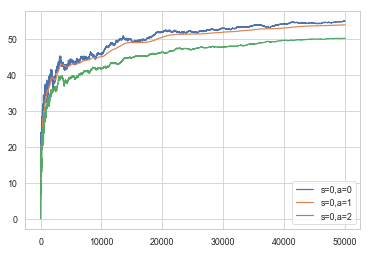

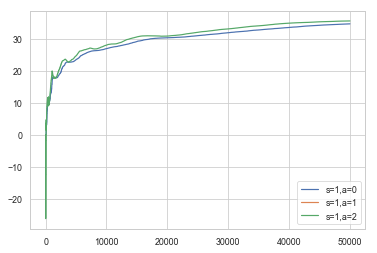

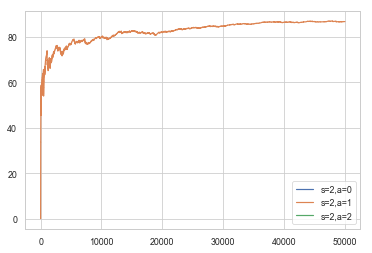

l_rate0= 0.500000 , l_decay=0.010000 
n_ite= 50000, discount_r= 0.990000 
epsilon0= 0.010000
[0 2 1]


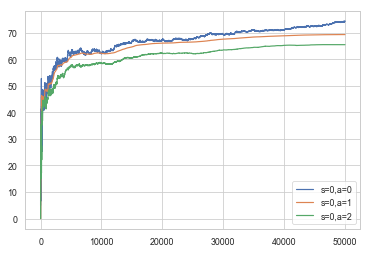

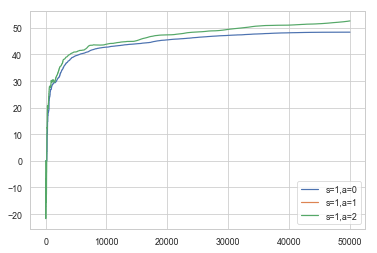

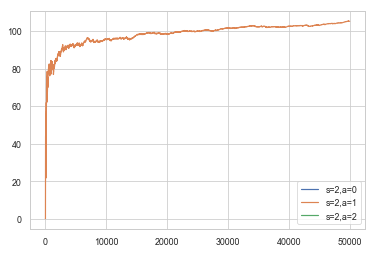

l_rate0= 0.500000 , l_decay=0.010000 
n_ite= 50000, discount_r= 0.990000 
epsilon0= 0.010000
[0 2 1]


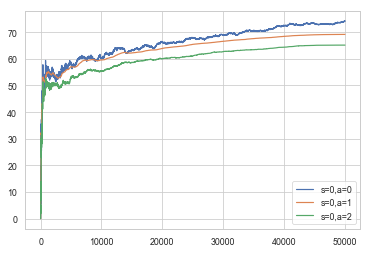

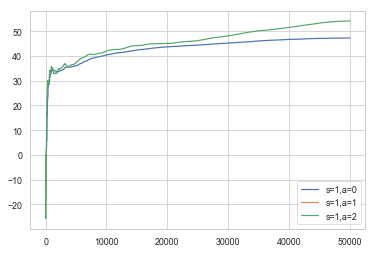

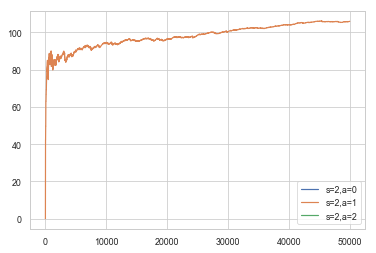

In [8]:
qLearning(l_rate0 = 0.5,l_decay=0.01,n_ite = 50000,discount_r=0.99)
epsilonGreedy(l_rate0 = 0.5,l_decay=0.01,n_ite = 50000,discount_r=0.99,epsilon0=0.01)
epsilonGreedy(l_rate0 = 0.5,l_decay=0.01,n_ite = 50000,discount_r=0.99,epsilon0=0.1)
# [21.88646116788489, 1.167031352301585, 53.86070610154327]

l_rate0= 0.500000 , l_decay=0.020000 
n_ite= 50000, discount_r= 0.950000 
[0 2 1]


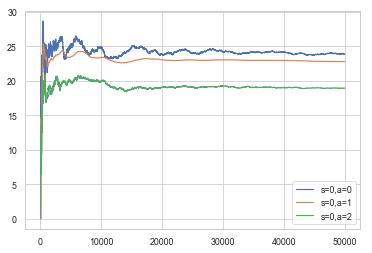

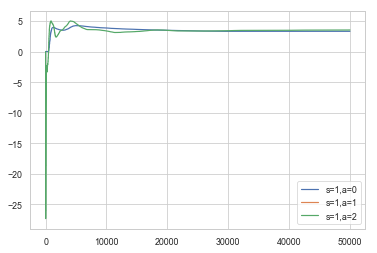

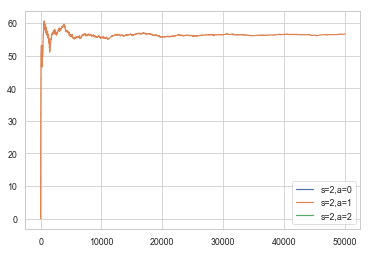

l_rate0= 0.500000 , l_decay=0.020000 
n_ite= 50000, discount_r= 0.950000 
epsilon0= 0.010000
[0 2 1]


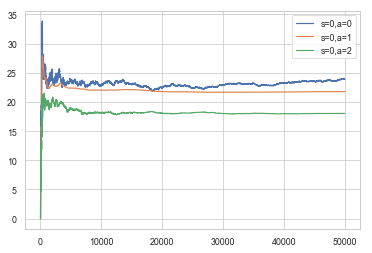

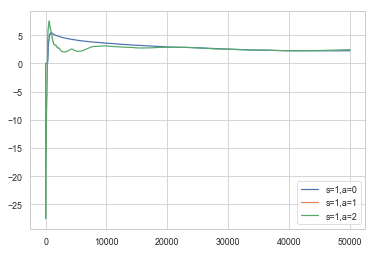

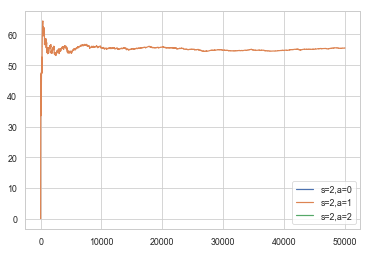

l_rate0= 0.500000 , l_decay=0.020000 
n_ite= 50000, discount_r= 0.950000 
epsilon0= 0.010000
[0 2 1]


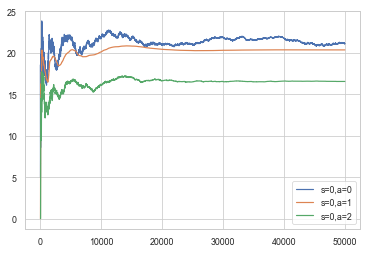

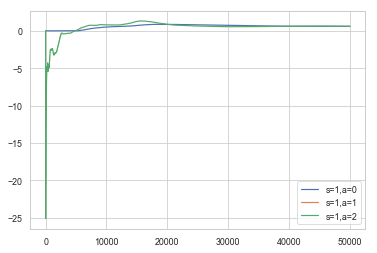

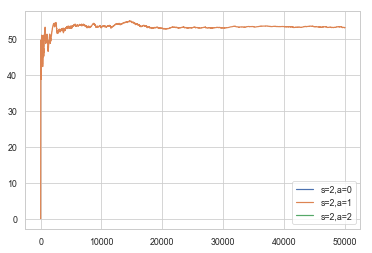

In [9]:
qLearning(l_rate0 = 0.5,l_decay=0.02,n_ite = 50000,discount_r=0.95)
epsilonGreedy(l_rate0 = 0.5,l_decay=0.02,n_ite = 50000,discount_r=0.95,epsilon0=0.01)
epsilonGreedy(l_rate0 = 0.5,l_decay=0.02,n_ite = 50000,discount_r=0.95,epsilon0=0.1)
# [21.88646116788489, 1.167031352301585, 53.86070610154327]

In [42]:
def TDLearning(l_rate0 = 0.5,l_decay=0.01,n_ite = 50000,discount_r=0.99): 
    learning_rate0 = l_rate0
    learning_rate_decay = l_decay
    n_iterations = n_ite
    discount_rate = discount_r    
    print("l_rate0= %f , l_decay=%f \nn_ite= %d, discount_r= %f " %(learning_rate0,learning_rate_decay,
                                                           n_iterations,discount_rate))
    s = 0
    Qs = []
    Q = np.full((3,3),-np.inf)
    Vs = []
    V = [0,0,0]
    for state, actions in enumerate(possible_actions):
        Q[state, actions] = 0.0

    for iteration in range(n_iterations):
        a = np.random.choice(possible_actions[s])
        sp = np.random.choice(range(3), p = T[s,a])
        reward = R[s,a,sp]
        learning_rate = learning_rate0/(1 + iteration* learning_rate_decay)
        Q[s, a] = ((1- learning_rate)*Q[s,a] + 
                  learning_rate * (reward + discount_rate * np.max(Q[sp])))
        Qr = Q.copy()
        Qs.append(Qr)
        V[s] = (1-learning_rate)*V[s] + learning_rate*(reward + discount_rate*V[sp])
        Vs.append(V.copy())
        s = sp

    print(np.argmax(Q,axis = 1))
    # plot reults
    for s in range(3):
        for a in range(3):
            res = []
            for i in range(n_iterations):
                res.append(Qs[i][s,a])
            plt.plot(res,label= "s=%d,a=%d" % (s,a))
        Vres = [Vs[i][s] for i in range(n_iterations)]
        plt.plot(Vres,label="V(s)=V(%d)"%s)
        plt.legend()
        plt.show()
    del Qs
    del Vs

In [43]:

def TDepsilonGreedy(l_rate0 = 0.5,l_decay=0.01,n_ite = 50000,discount_r=0.99,epsilon0 = 0.01):
    learning_rate0 = l_rate0
    learning_rate_decay = l_decay
    n_iterations = n_ite
    discount_rate = discount_r    
    epsilon = 1
    epsilon0 = 0.01
    print("l_rate0= %f , l_decay=%f \nn_ite= %d, discount_r= %f \nepsilon0= %f" 
          %(learning_rate0,learning_rate_decay,n_iterations,discount_rate,epsilon0))
    s = 0
    Qs = []
    Q = np.full((3,3),-np.inf)
    Vs = [ ]
    V  = [0,0,0]
    for state, actions in enumerate(possible_actions):
        Q[state, actions] = 0.0

    for iteration in range(n_iterations):
        u = unif.rvs(1)
        if epsilon0 + (epsilon - epsilon0)*iteration/n_iterations > u:
            a = np.argmax(Q[s])
        else:
            a = np.random.choice(possible_actions[s])
        sp = np.random.choice(range(3), p = T[s,a])
        reward = R[s,a,sp]
        learning_rate = learning_rate0/(1 + iteration* learning_rate_decay)
        Q[s, a] = ((1- learning_rate)*Q[s,a] + 
                  learning_rate * (reward + discount_rate * np.max(Q[sp])))
        Qr = Q.copy()
        Qs.append(Qr)
        V[s] = (1-learning_rate)*V[s] + learning_rate*(reward + discount_rate*V[sp])
        Vs.append(V.copy())
        s = sp

    print(np.argmax(Q,axis = 1))
    # plot reults
    for s in range(3):
        for a in range(3):
            res = []
            for i in range(n_iterations):
                res.append(Qs[i][s,a])
            plt.plot(res,label= "s=%d,a=%d" % (s,a))
        Vres = [Vs[i][s] for i in range(n_iterations)]
        plt.plot(Vres,label="V(s)=V(%d)"%s)
        plt.legend()
        plt.show()
    del Qs
    del Vs

l_rate0= 0.500000 , l_decay=0.050000 
n_ite= 50000, discount_r= 0.950000 
[0 0 1]


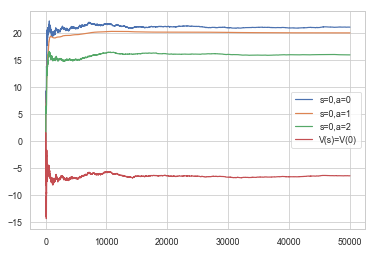

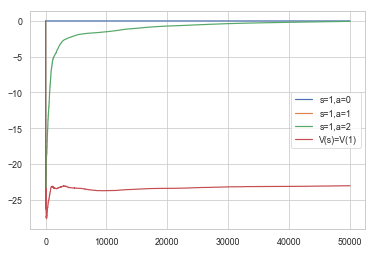

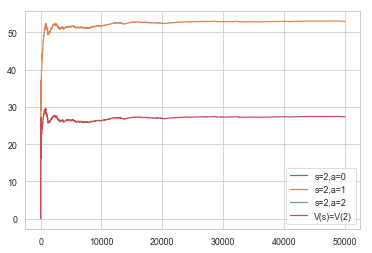

l_rate0= 0.500000 , l_decay=0.050000 
n_ite= 50000, discount_r= 0.950000 
epsilon0= 0.010000
[0 0 1]


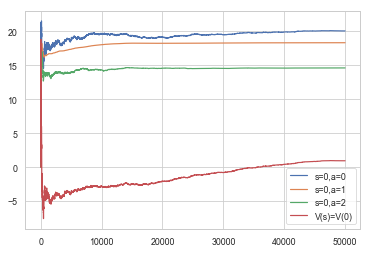

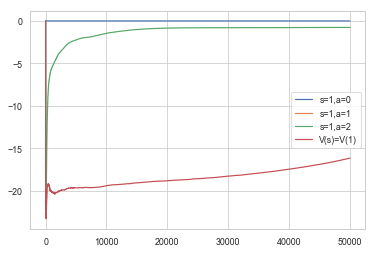

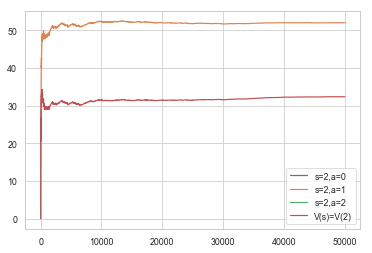

In [44]:

TDLearning(l_rate0 = 0.5,l_decay=0.05,n_ite = 50000,discount_r=0.95)
TDepsilonGreedy(l_rate0 = 0.5,l_decay=0.05,n_ite = 50000,discount_r=0.95)
# [21.88646116788489, 1.167031352301585, 53.86070610154327]